In [1]:
#Load input spike trains
spike_file = '../input_spike_trains/spike_trains_DG_L4.dat' #to load spikes from
#spike_file = '../input_spike_trains/spike_trains_SP_1.dat' #to load spikes from
to_mat_file = None #to save spikes to (None to skip saving)

In [2]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
#load input spikes from file
f = open(spike_file, 'r')
inp_spikes = f.readlines()
f.close()
spike_times = []
for n in range(len(inp_spikes)):
    inp_spike_train = inp_spikes[n][1:-2].split(' ')
    if len(inp_spike_train[0])>0:
        inp_spike_train = [1e-3*float(inp_spike_train[k]) for k in range(len(inp_spike_train))] #convert to (s)
    else:
        inp_spike_train = []
    spike_times.append(inp_spike_train)

In [4]:
#Extract firing rates
signal_length = max([max(spike_times[k]) if len(spike_times[k])>0 else 0 for k in range(len(spike_times))])
num_inputs = len(spike_times)
firing_rates = [1.0*len(spike_times[k])/signal_length for k in range(len(spike_times))] #compute single-cell firing rates
num_spikes = np.sum([len(spike_times[k]) for k in range(len(spike_times))])  #total number of spikes
mean_rate = 1.0*num_spikes/(signal_length*num_inputs)
print('Signal length: %.2fs'%(signal_length))
print('Mean firing rate: %.2fHz'%(mean_rate))

Signal length: 240.00s
Mean firing rate: 0.19Hz


In [ ]:
#save to .mat file (optional)
if to_mat_file!=None:
    sio.savemat(to_mat_file, {'spike_times': spike_times, 'firing_rates': firing_rates})

In [5]:
#sort by firing rates (ONLY FOR TESTING)
spike_times = np.array(spike_times)[np.argsort(firing_rates)]

<IPython.core.display.Javascript object>


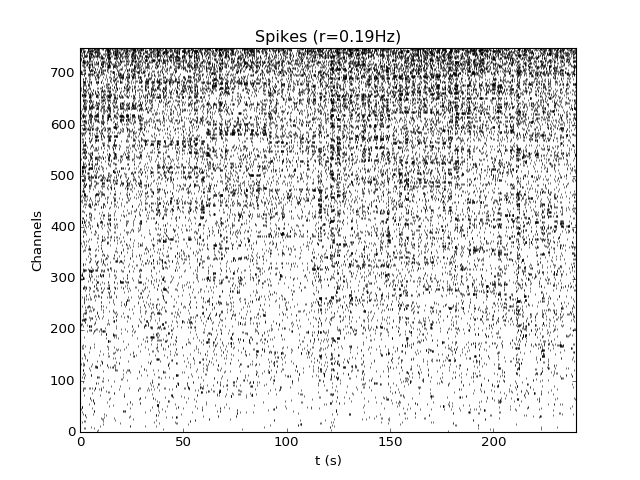

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for n in range(num_inputs):
    ax.plot(spike_times[n], (n + 1)*np.ones_like(spike_times[n]), '|k', markersize=1)
    #ax.plot([spike_times[n], spike_times[n]], [(0.5+n)*np.ones_like(spike_times[n]), (1.5+n)*np.ones_like(spike_times[n])], 'k')
ax.set_xlim((0, signal_length))
#ax.set_xlim((0, 10))
ax.set_ylim((0.5, num_inputs+0.5))
ax.set_xlabel('t (s)')
ax.set_ylabel('Channels')
ax.set_title('Spikes (r=%.2fHz)'%(mean_rate))